# Apresentação

Este projeto objetiva implementar a lógica fuzzy para analisar diferentes investimentos, considerando as características  do investimento e o contexto do investidor, retornando o potencial do investimento.

## Lógica Fuzzy

A Lógica Fuzzy recebe entradas e, ao invés de retornar um "sim" ou "não" a depender dessas entradas, ele retorna um valor entre sim e não. Ou seja, essa lógica não trabalha com os extremos, mas sim avalia as entradas e dá uma "nota" para elas, atribuindo uma característica a cada intervalo de notas. Por exemplo, no cenário aqui trabalho uma nota 0,6 poderia ser considerada 90% moderada e 10% boa, o que faria o investimento ser considerado de risco moderado.

## Variáveis Analisadas

Entrada:
* Valor Investido
* Tempo de Investimento
* Taxa de Crescimento
* Renda Mensal
* Dívida
* Estabilidade no Trabalho

Saída:
* Risco

## Regras

* 1- SE valor investido é alto E tempo de investimento é longo E taxa de crescimento é alta ENTÃO potencial de investimento é excelente.
* 2- SE valor investido é baixo E tempo de investimento é curto E taxa de crescimento é baixa ENTÃO potencial de investimento é ruim.
* 3- SE valor investido é médio E tempo de investimento é longo E taxa de crescimento é alta ENTÃO potencial de investimento é bom.
* 4- SE valor investido é alto E tempo de investimento é médio E taxa de crescimento é baixa E dívida é alta ENTÃO potencial de investimento é moderado.
* 5- SE valor investido é baixo E renda mensal é alta E dívida é baixa ENTÃO potencial de investimento é moderado.
* 6- SE valor investido é médio E taxa de crescimento é alta E estabilidade no trabalho é alta ENTÃO potencial de investimento é bom.
* 7- SE valor investido é alto E tempo de investimento é curto E taxa de crescimento é média E dívida é baixa ENTÃO potencial de investimento é bom.
* 8- SE valor investido é médio E tempo de investimento é curto E taxa de crescimento é baixa E dívida é alta ENTÃO potencial de investimento é ruim.
* 9- SE valor investido é baixo E tempo de investimento é longo E taxa de crescimento é média E estabilidade no trabalho é alta ENTÃO potencial de investimento é moderado.
* 10- SE valor investido é alto E taxa de crescimento é baixa E renda mensal é alta E dívida é baixa ENTÃO potencial de investimento é bom.
* 11- SE valor investido é médio E tempo de investimento é médio E taxa de crescimento é média E estabilidade no trabalho é baixa ENTÃO potencial de investimento é moderado.
* 12- SE valor investido é baixo E taxa de crescimento é alta E renda mensal é baixa E estabilidade no trabalho é média ENTÃO potencial de investimento é moderado.
* 13- SE valor investido é alto E tempo de investimento é longo E taxa de crescimento é média E dívida é baixa ENTÃO potencial de investimento é excelente.
* 14- SE valor investido é médio E tempo de investimento é curto E taxa de crescimento é alta E renda mensal é média ENTÃO potencial de investimento é bom.
* 15- SE valor investido é baixo E tempo de investimento é longo E taxa de crescimento é baixa E estabilidade no trabalho é alta ENTÃO potencial de investimento é moderado.
* 16- SE valor investido é alto E taxa de crescimento é alta E dívida é alta E estabilidade no trabalho é alta ENTÃO potencial de investimento é bom.
* 17- SE valor investido é médio E tempo de investimento é longo E taxa de crescimento é baixa E dívida é alta ENTÃO potencial de investimento é moderado.
* 18- SE valor investido é baixo E taxa de crescimento é média E renda mensal é alta E estabilidade no trabalho é baixa ENTÃO potencial de investimento é moderado.
* 19- SE valor investido é médio E tempo de investimento é médio E taxa de crescimento é alta E dívida é baixa ENTÃO potencial de investimento é bom.
* 20- SE valor investido é alto E tempo de investimento é longo E taxa de crescimento é alta E dívida é baixa E estabilidade no trabalho é alta ENTÃO potencial de investimento é excelente.

# Código

In [1]:
import numpy as np  
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
valor_investido = ctrl.Antecedent(np.arange(0, 101, 1), 'valor_investido')
tempo_investimento = ctrl.Antecedent(np.arange(0, 101, 1), 'tempo_investimento')
taxa_crescimento = ctrl.Antecedent(np.arange(0, 101, 1), 'taxa_crescimento')
renda_mensal = ctrl.Antecedent(np.arange(0, 101, 1), 'renda_mensal')
divida = ctrl.Antecedent(np.arange(0, 101, 1), 'divida')
estabilidade_trabalho = ctrl.Antecedent(np.arange(0, 101, 1), 'estabilidade_trabalho')
risco = ctrl.Consequent(np.arange(0, 101, 1), 'risco')

valor_investido['baixo'] = fuzz.trimf(valor_investido.universe, [0, 0, 50])
valor_investido['medio'] = fuzz.trimf(valor_investido.universe, [30, 50, 70])
valor_investido['alto'] = fuzz.trimf(valor_investido.universe, [60, 100, 100])

tempo_investimento['curto'] = fuzz.trimf(tempo_investimento.universe, [0, 0, 20])
tempo_investimento['medio'] = fuzz.trimf(tempo_investimento.universe, [15, 50, 85])
tempo_investimento['longo'] = fuzz.trimf(tempo_investimento.universe, [70, 100, 100])

taxa_crescimento['baixa'] = fuzz.trimf(taxa_crescimento.universe, [0, 0, 25])
taxa_crescimento['media'] = fuzz.trimf(taxa_crescimento.universe, [20, 50, 80])
taxa_crescimento['alta'] = fuzz.trimf(taxa_crescimento.universe, [70, 100, 100])

renda_mensal['baixa'] = fuzz.trimf(renda_mensal.universe, [0, 0, 40])
renda_mensal['media'] = fuzz.trimf(renda_mensal.universe, [30, 60, 90])
renda_mensal['alta'] = fuzz.trimf(renda_mensal.universe, [75, 100, 100])

divida['baixa'] = fuzz.trimf(divida.universe, [0, 0, 35])
divida['media'] = fuzz.trimf(divida.universe, [25, 50, 75])
divida['alta'] = fuzz.trimf(divida.universe, [70, 100, 100])

estabilidade_trabalho['baixa'] = fuzz.trimf(estabilidade_trabalho.universe, [0, 0, 50])
estabilidade_trabalho['media'] = fuzz.trimf(estabilidade_trabalho.universe, [30, 50, 70])
estabilidade_trabalho['alta'] = fuzz.trimf(estabilidade_trabalho.universe, [60, 100, 100])

risco['ruim'] = fuzz.trimf(risco.universe, [0, 0, 40])
risco['moderado'] = fuzz.trimf(risco.universe, [30, 50, 70])
risco['bom'] = fuzz.trimf(risco.universe, [60, 80, 100])
risco['excelente'] = fuzz.trimf(risco.universe, [80, 100, 100])

## Plots

### Valor Investido

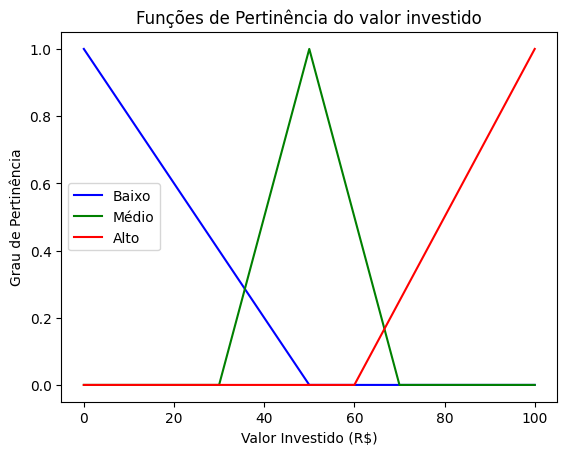

In [3]:
plt.figure()
plt.plot(valor_investido.universe, valor_investido['baixo'].mf, 'b', label='Baixo')
plt.plot(valor_investido.universe, valor_investido['medio'].mf, 'g', label='Médio')
plt.plot(valor_investido.universe, valor_investido['alto'].mf, 'r', label='Alto')
plt.title('Funções de Pertinência do valor investido')
plt.xlabel('Valor Investido (R$)')
plt.ylabel('Grau de Pertinência')
plt.legend()
plt.show()

### Tempo de Investimento

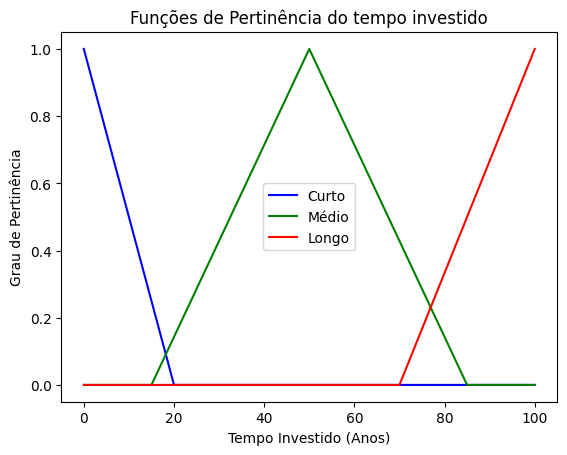

In [4]:
plt.figure()
plt.plot(tempo_investimento.universe, tempo_investimento['curto'].mf, 'b', label='Curto')
plt.plot(tempo_investimento.universe, tempo_investimento['medio'].mf, 'g', label='Médio')
plt.plot(tempo_investimento.universe, tempo_investimento['longo'].mf, 'r', label='Longo')
plt.title('Funções de Pertinência do tempo investido')
plt.xlabel('Tempo Investido (Anos)')
plt.ylabel('Grau de Pertinência')
plt.legend()
plt.show()

### Taxa de Crescimento

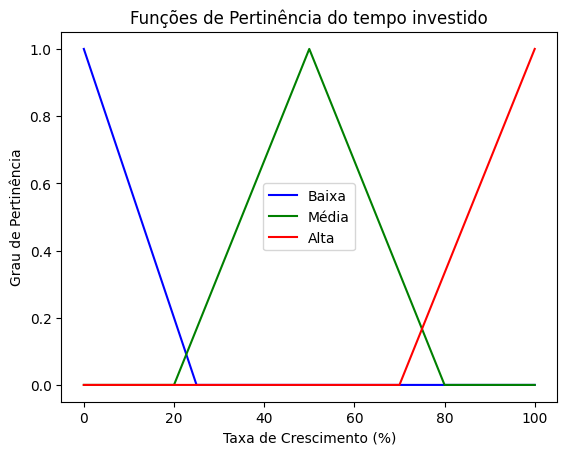

In [5]:
plt.figure()
plt.plot(taxa_crescimento.universe, taxa_crescimento['baixa'].mf, 'b', label='Baixa')
plt.plot(taxa_crescimento.universe, taxa_crescimento['media'].mf, 'g', label='Média')
plt.plot(taxa_crescimento.universe, taxa_crescimento['alta'].mf, 'r', label='Alta')
plt.title('Funções de Pertinência do tempo investido')
plt.xlabel('Taxa de Crescimento (%)')
plt.ylabel('Grau de Pertinência')
plt.legend()
plt.show()

### Renda Mensal

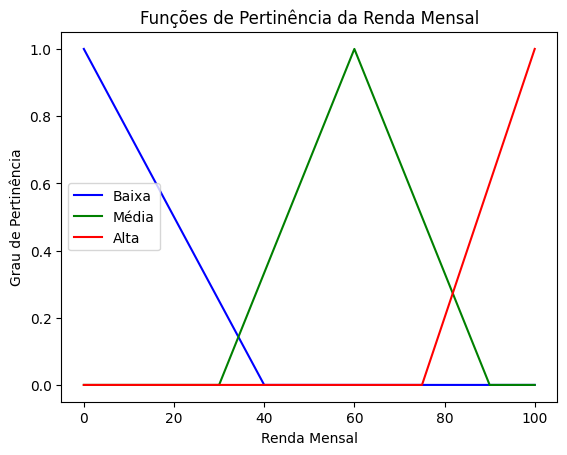

In [6]:
plt.figure()
plt.plot(renda_mensal.universe, renda_mensal['baixa'].mf, 'b', label='Baixa')
plt.plot(renda_mensal.universe, renda_mensal['media'].mf, 'g', label='Média')
plt.plot(renda_mensal.universe, renda_mensal['alta'].mf, 'r', label='Alta')
plt.title('Funções de Pertinência da Renda Mensal')
plt.xlabel('Renda Mensal')
plt.ylabel('Grau de Pertinência')
plt.legend()
plt.show()

### Dívida

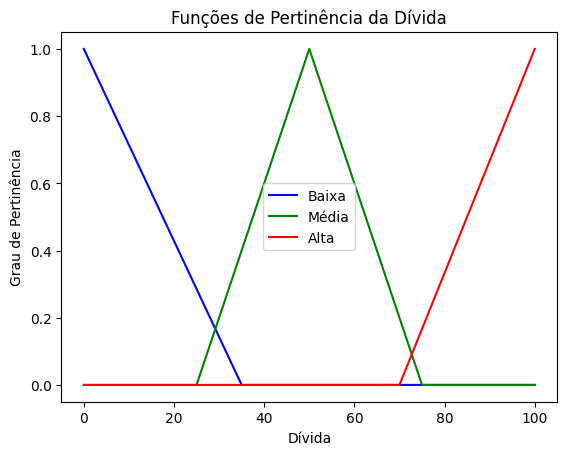

In [7]:
plt.figure()
plt.plot(divida.universe, divida['baixa'].mf, 'b', label='Baixa')
plt.plot(divida.universe, divida['media'].mf, 'g', label='Média')
plt.plot(divida.universe, divida['alta'].mf, 'r', label='Alta')
plt.title('Funções de Pertinência da Dívida')
plt.xlabel('Dívida')
plt.ylabel('Grau de Pertinência')
plt.legend()
plt.show()

### Estabilidade no Trabalho

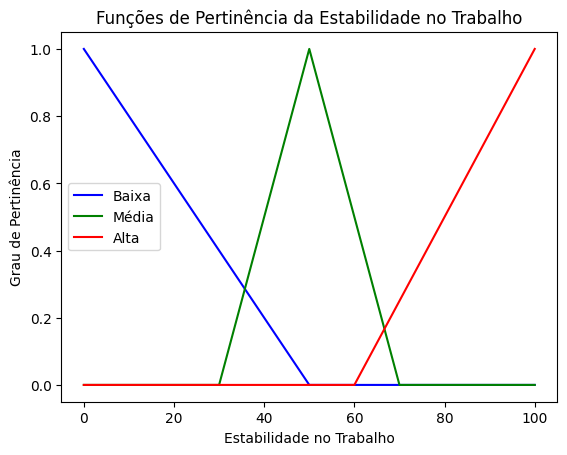

In [8]:
plt.figure()
plt.plot(estabilidade_trabalho.universe, estabilidade_trabalho['baixa'].mf, 'b', label='Baixa')
plt.plot(estabilidade_trabalho.universe, estabilidade_trabalho['media'].mf, 'g', label='Média')
plt.plot(estabilidade_trabalho.universe, estabilidade_trabalho['alta'].mf, 'r', label='Alta')
plt.title('Funções de Pertinência da Estabilidade no Trabalho')
plt.xlabel('Estabilidade no Trabalho')
plt.ylabel('Grau de Pertinência')
plt.legend()
plt.show()

### Risco

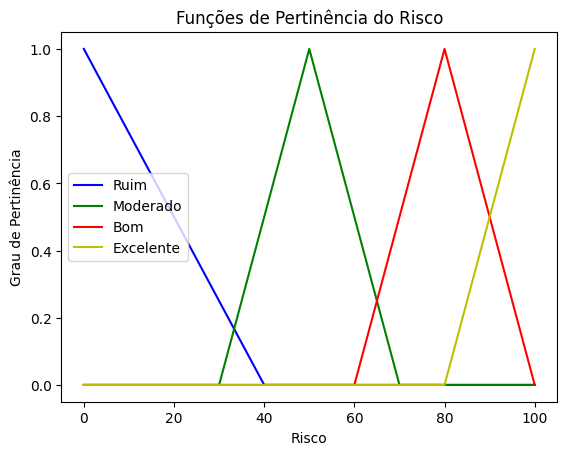

In [9]:
plt.figure()
plt.plot(risco.universe, risco['ruim'].mf, 'b', label='Ruim')
plt.plot(risco.universe, risco['moderado'].mf, 'g', label='Moderado')
plt.plot(risco.universe, risco['bom'].mf, 'r', label='Bom')
plt.plot(risco.universe, risco['excelente'].mf, 'y', label='Excelente')
plt.title('Funções de Pertinência do Risco')
plt.xlabel('Risco')
plt.ylabel('Grau de Pertinência')
plt.legend()
plt.show()

## Regras

In [10]:
regra1 = ctrl.Rule(valor_investido['alto'] & tempo_investimento['longo'] & taxa_crescimento['alta'], risco['excelente'])
regra2 = ctrl.Rule(valor_investido['baixo'] & tempo_investimento['curto'] & taxa_crescimento['baixa'], risco['ruim'])
regra3 = ctrl.Rule(valor_investido['medio'] & tempo_investimento['longo'] & taxa_crescimento['alta'], risco['bom'])
regra4 = ctrl.Rule(valor_investido['alto'] & tempo_investimento['medio'] & taxa_crescimento['baixa'] & divida['alta'], risco['moderado'])
regra5 = ctrl.Rule(valor_investido['baixo'] & renda_mensal['alta'] & divida['baixa'], risco['moderado'])
regra6 = ctrl.Rule(valor_investido['medio'] & taxa_crescimento['alta'] & estabilidade_trabalho['alta'], risco['bom'])
regra7 = ctrl.Rule(valor_investido['alto'] & tempo_investimento['curto'] & taxa_crescimento['media'] & divida['baixa'], risco['bom'])
regra8 = ctrl.Rule(valor_investido['medio'] & tempo_investimento['curto'] & taxa_crescimento['baixa'] & divida['alta'], risco['ruim'])
regra9 = ctrl.Rule(valor_investido['baixo'] & tempo_investimento['longo'] & taxa_crescimento['media'] & estabilidade_trabalho['alta'], risco['moderado'])
regra10 = ctrl.Rule(valor_investido['alto'] & taxa_crescimento['baixa'] & renda_mensal['alta'] & divida['baixa'], risco['bom'])
regra11 = ctrl.Rule(valor_investido['medio'] & tempo_investimento['medio'] & taxa_crescimento['media'] & estabilidade_trabalho['baixa'], risco['moderado'])
regra12 = ctrl.Rule(valor_investido['baixo'] & taxa_crescimento['alta'] & renda_mensal['baixa'] & estabilidade_trabalho['media'], risco['moderado'])
regra13 = ctrl.Rule(valor_investido['alto'] & tempo_investimento['longo'] & taxa_crescimento['media'] & divida['baixa'], risco['excelente'])
regra14 = ctrl.Rule((valor_investido['medio'] | tempo_investimento['curto']) & taxa_crescimento['alta'] & renda_mensal['media'], risco['bom'])
regra15 = ctrl.Rule(valor_investido['baixo'] & tempo_investimento['longo'] & taxa_crescimento['baixa'] & estabilidade_trabalho['alta'], risco['moderado'])
regra16 = ctrl.Rule(valor_investido['alto'] & taxa_crescimento['alta'] & divida['alta'] & estabilidade_trabalho['alta'], risco['bom'])
regra17 = ctrl.Rule(valor_investido['medio'] & tempo_investimento['longo'] & taxa_crescimento['baixa'] & divida['alta'], risco['moderado'])
regra18 = ctrl.Rule(valor_investido['baixo'] & taxa_crescimento['media'] & renda_mensal['alta'] & estabilidade_trabalho['baixa'], risco['moderado'])
regra19 = ctrl.Rule(valor_investido['medio'] & tempo_investimento['medio'] & taxa_crescimento['alta'] & divida['baixa'], risco['bom'])
regra20 = ctrl.Rule(valor_investido['alto'] & tempo_investimento['longo'] & taxa_crescimento['alta'] & divida['baixa'] & estabilidade_trabalho['alta'], risco['excelente'])

In [11]:
sistema_investimento = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10,
                                             regra11, regra12, regra13, regra14, regra15, regra16, regra17, regra18, regra19, regra20])
simulacao_investimento = ctrl.ControlSystemSimulation(sistema_investimento)

simulacao_investimento.input['valor_investido'] = 85
simulacao_investimento.input['tempo_investimento'] = 90
simulacao_investimento.input['taxa_crescimento'] = 80
simulacao_investimento.input['renda_mensal'] = 80
simulacao_investimento.input['divida'] = 90
simulacao_investimento.input['estabilidade_trabalho'] = 40

simulacao_investimento.compute()
if 'risco' in simulacao_investimento.output:
    print(f"Risco: {simulacao_investimento.output['risco']:.2f}")
else:
    print("Erro: 'risco' não foi calculado corretamente.")


Risco: 91.56


c:\Users\Enzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


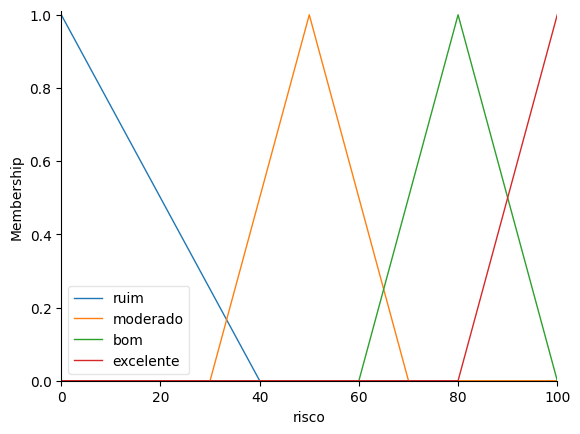

In [12]:
risco.view()

Saída crisp no investimento: 91.56


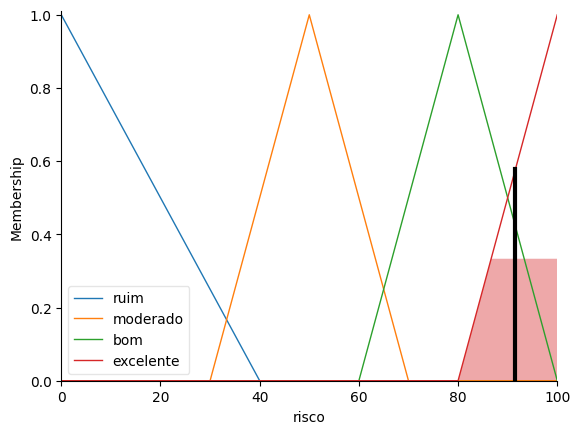

In [13]:
risco.view(sim=simulacao_investimento)

print(f"Saída crisp no investimento: {simulacao_investimento.output['risco']:.2f}")

In [14]:
# Geração da superfície
velocidade_range = np.linspace(0, 150, 20)
distancia_range = np.linspace(0, 200, 20)
x, y = np.meshgrid(velocidade_range, distancia_range)

# Calculando os valores de pressão para cada combinação de velocidade e distância
z = np.zeros_like(x)
for i in range(20):
    for j in range(20):
        simulacao_investimento.input['valor_investido'] = x[i, j]
        simulacao_investimento.input['taxa_crescimento'] = y[i, j]
        try:
            simulacao_investimento.compute()
            z[i, j] = simulacao_investimento.output['risco']
        except KeyError:
            z[i, j] = np.nan  # Se houver um erro, atribuir NaN

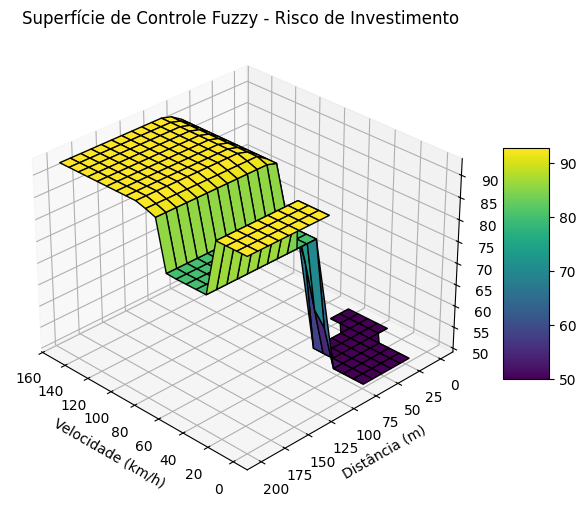

In [15]:
# Plotando a superfície 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Superfície com preenchimento e bordas pretas e coloração 'viridis'
surface = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='black')

# Adicionar barra de cores para mostrar a escala de cores
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)

# Ajustar a visualização
ax.view_init(elev=30, azim=135)  # Ajustar o ângulo da visualização
ax.set_xlabel('Velocidade (km/h)', fontsize=10)
ax.set_ylabel('Distância (m)', fontsize=10)
ax.set_zlabel('Pressão (%)', fontsize=10)
ax.set_title('Superfície de Controle Fuzzy - Risco de Investimento', fontsize=12)

plt.show()